<a href="https://colab.research.google.com/github/jwoodz0188/Homework/blob/main/16_1n4JustinaGomez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

16.1 How well dose the  Fashion-MNIST compare to MNIST? How do he Training times compare?

*   Fashion-MNIST
      - Training time: 12mins 29sec
      - loss: 0.2646584212779999 = 26%
      - Accuracy: 0.9043999910354614 = 90%
      - incorrect_predictions: 956


*   MNIST
      - Training time: 12mins 48sec
      - loss: 0.028634442016482353 = 2%
      - Accuracy: 0.991599977016449 = 99%
      - incorrect_predictions: 84

so as you can see according to the numbers recorded that while Fashion-MNIST was faster by a few seconds it's data is less accurate.

In 16.4.
remove the 1st dense layer. How dose this change Acuracy?
now add a dense layer with 4096 neurons before the 2 original layers. how dose this change the Acuracy?


*   only 1 dense layer
      - Training time: 13min 23sec
      - loss: 0.2768920063972473 = 27%
      - Accuracy: 0.896399974822998 = 89%
      - incorrect_predictions: 1036

*   3 dense layers ( one of 4096 neurons)

      - Training time: 14min 23sec
      - loss: 0.36127692461013794 = 36%
      - Accuracy: 0.9031000137329102 = 90%
      - incorrect_predictions: 969

 So, when I frist read this task I believed that the one with 3 layers was going to take longer but would be closer to the MNIST acuracy. This is in correct. while it did take longer it adding a dense layer did not increase acuracy it lowed it, while the same is true for using only one dense layer. It seems the useage is really a fine tuned matchine and just adding to or taking away will not give you bettter results. You as a professional really do need to have a good grasp on the elements and on how to use them.

In [62]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir logs

pre 16.1 Loading the fashion_mninst Dataset




In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()



Data Exploration

In [66]:
X_train.shape

(60000, 28, 28)

In [67]:
y_train.shape

(60000,)

In [68]:
X_test.shape

(10000, 28, 28)

In [69]:
y_test.shape

(10000,)

In [70]:
%matplotlib inline

In [71]:
import seaborn as sns

Visualizing Digits

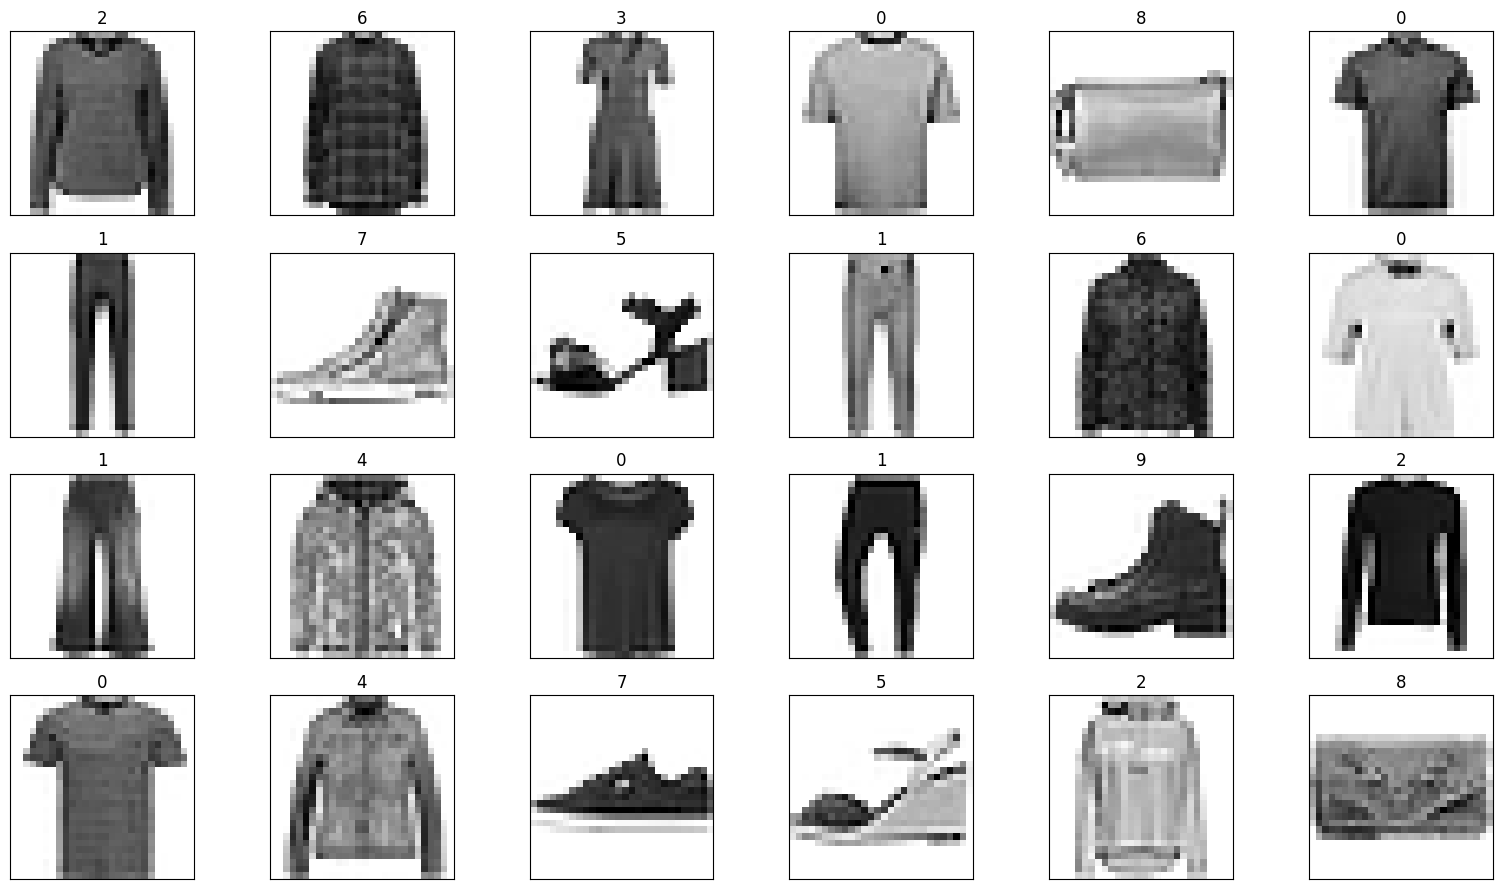

In [72]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

Reshaping the Image Data

In [73]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [74]:
X_train.shape

(60000, 28, 28, 1)

In [75]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [76]:
X_test.shape

(10000, 28, 28, 1)

Normalizing the Image Data

In [77]:
X_train = X_train.astype('float32') / 255

In [78]:
X_test = X_test.astype('float32') / 255

One-Hot Encoding: Convert Labels to Categorical Data

In [79]:
from tensorflow.keras.utils import to_categorical

In [80]:
y_train = to_categorical(y_train)

In [81]:
y_train.shape

(60000, 10)

In [82]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [83]:
y_test = to_categorical(y_test)

In [84]:
y_test.shape

(10000, 10)

Creating the Neural Network

In [85]:
from tensorflow.keras.models import Sequential

In [86]:
cnn = Sequential()

In [87]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

Adding a Convolution Layer

In [88]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
               input_shape=(28, 28, 1)))

Adding a Pooling Layer

In [89]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

Adding Another Convolutional Layer and Pooling Layer

In [90]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [91]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

Flattening the Results

In [92]:
cnn.add(Flatten())

Adding a Dense Layer to Reduce the Number of Features

 on 16.4 we are ask to remove the first layer to do this I simply commeted out the line.

 If you add another Dense layer with 4096 neurons

In [118]:
cnn.add(Dense(4096,kernel_regularizer='l2' ,activation='relu'))

In [119]:
cnn.add(Dense(units=128, activation='relu'))

Adding Another Dense Layer to Produce the Final Output

In [120]:
cnn.add(Dense(units=10, activation='softmax'))

Printing the Model’s Summary

In [121]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

Visualizing a Model’s Structure

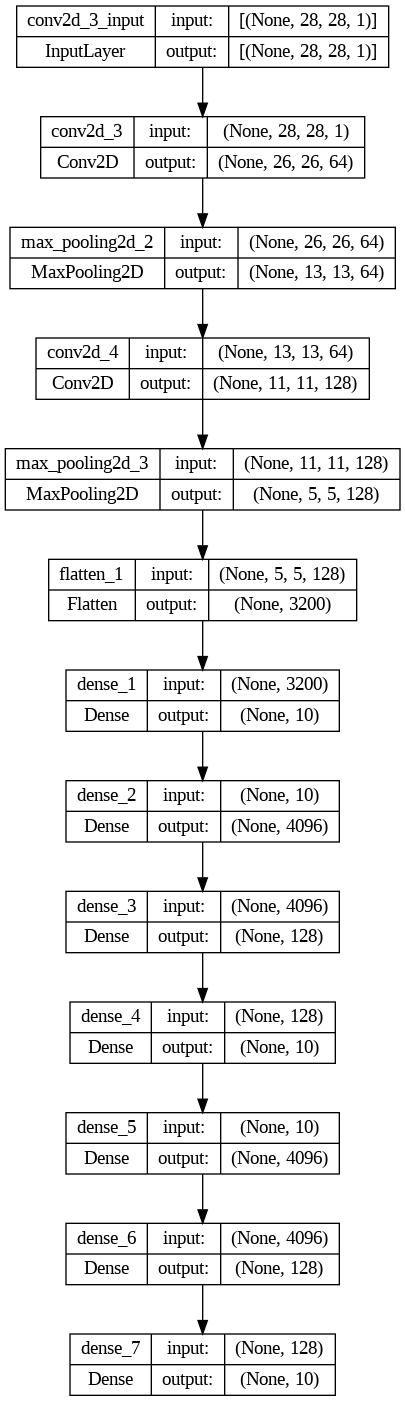

In [122]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')

Compiling the Model

In [123]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

Training and Evaluating the Model

In [124]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 169s 198ms/step - loss: 0.6312 - accuracy: 0.8354 - val_loss: 0.4234 - val_accuracy: 0.9033
Epoch 2/5
844/844 [==============================] - 163s 194ms/step - loss: 0.3586 - accuracy: 0.9162 - val_loss: 0.3727 - val_accuracy: 0.9053
Epoch 3/5
844/844 [==============================] - 163s 193ms/step - loss: 0.3217 - accuracy: 0.9209 - val_loss: 0.3742 - val_accuracy: 0.9055
Epoch 4/5
844/844 [==============================] - 163s 193ms/step - loss: 0.2856 - accuracy: 0.9286 - val_loss: 0.3704 - val_accuracy: 0.9058
Epoch 5/5
844/844 [==============================] - 164s 194ms/step - loss: 0.2670 - accuracy: 0.9304 - val_loss: 0.3561 - val_accuracy: 0.9098


Evaluating the Model on Unseen Data with Model’s evaluate Method

In [125]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.3613 - accuracy: 0.9031


In [126]:
loss

0.36127692461013794

In [127]:
accuracy

0.9031000137329102

Making Predictions with the Model’s predict Method

In [128]:
predictions = cnn.predict(X_test)

313/313 [==============================] - 7s 22ms/step


In [129]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [130]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0185701909%
1: 0.0007758144%
2: 0.0000105469%
3: 0.0004017199%
4: 0.0002692943%
5: 0.0766487035%
6: 0.0034027787%
7: 0.2805453027%
8: 0.1514483825%
9: 99.4679272175%


Locating the Incorrect Predictions

In [131]:
images = X_test.reshape((10000, 28, 28))

In [132]:
incorrect_predictions = []

In [133]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [134]:
len(incorrect_predictions)

969

Visualizing Incorrect Predictions

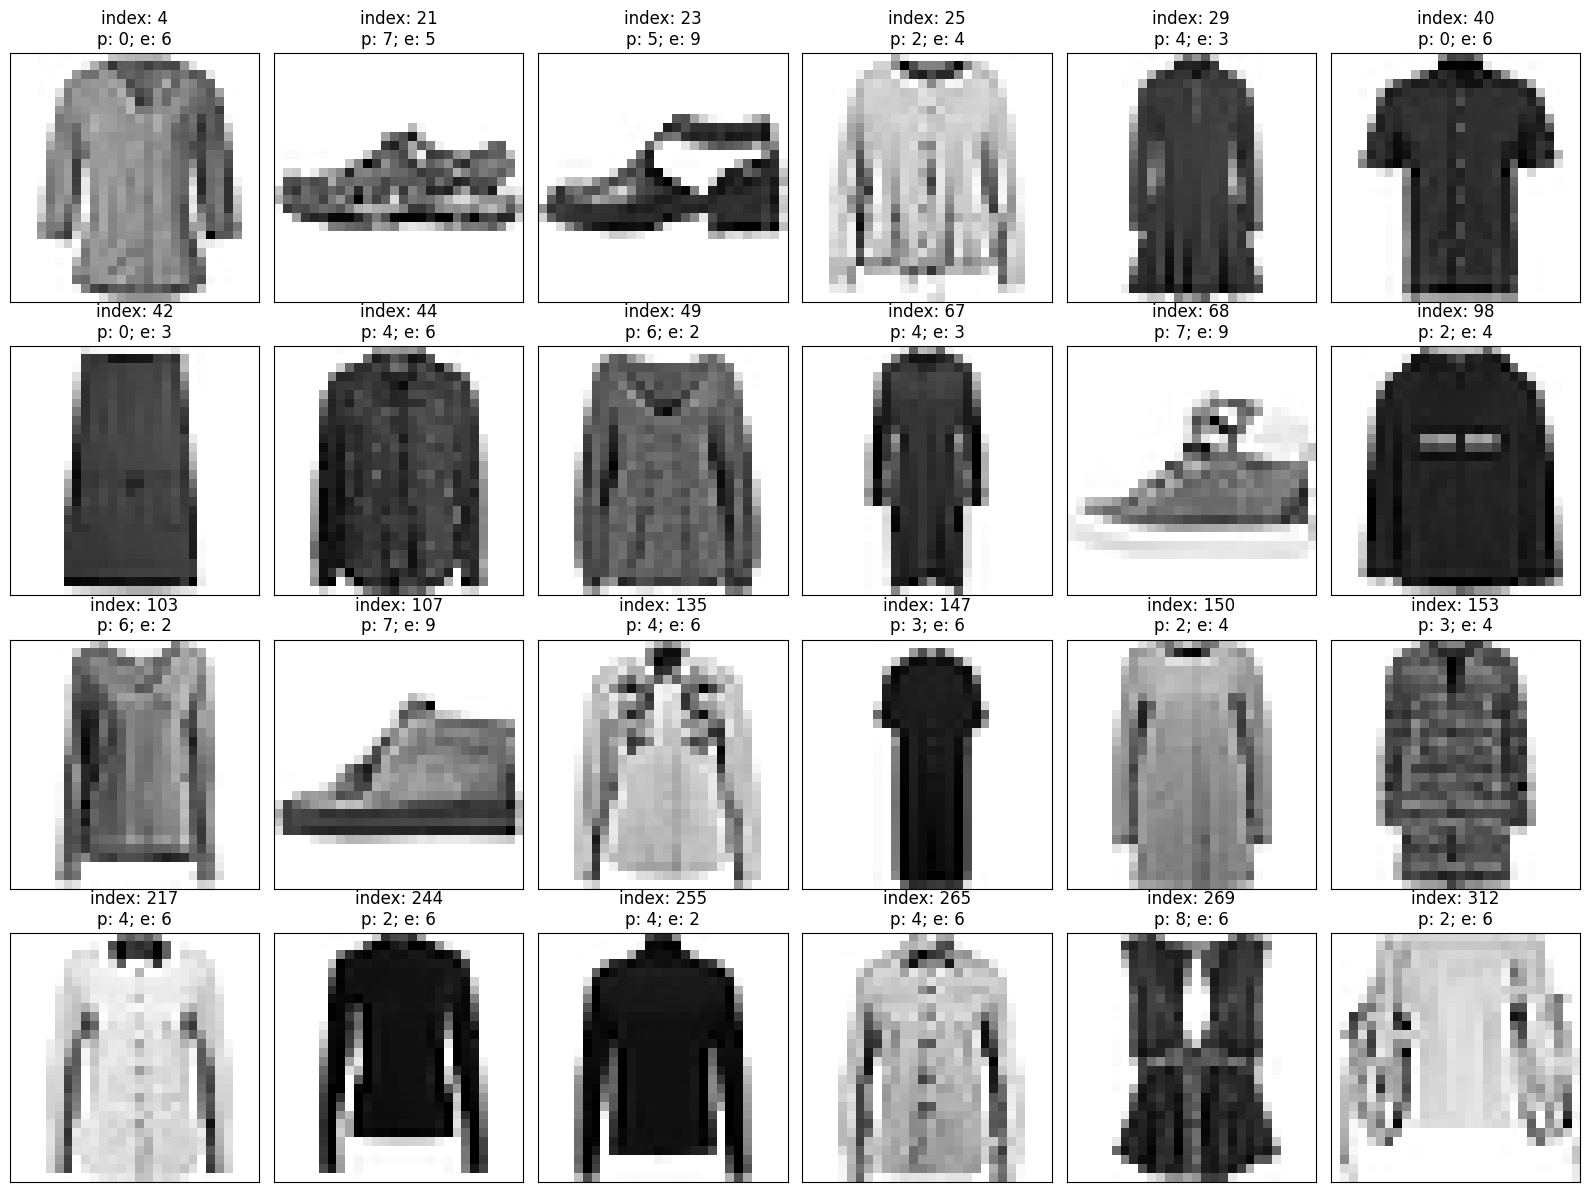

In [135]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

Displaying the Probabilities for Several Incorrect Predictions

In [136]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [137]:
display_probabilities(predictions[340])

0: 0.0529730518%
1: 0.0282685971%
2: 2.4659790099%
3: 0.8137199096%
4: 94.2211627960%
5: 0.2727158368%
6: 2.0737314597%
7: 0.0308547082%
8: 0.0217946304%
9: 0.0188146470%


In [111]:
display_probabilities(predictions[740])

0: 0.2726853127%
1: 0.0291007222%
2: 0.0204252996%
3: 96.0888266563%
4: 0.8801609278%
5: 0.0038718310%
6: 2.5381485000%
7: 0.0119708951%
8: 0.1490595751%
9: 0.0057550755%


In [138]:
display_probabilities(predictions[1260])

0: 96.8618333340%
1: 0.0179677983%
2: 0.0066294146%
3: 0.1722503686%
4: 0.0120754179%
5: 0.0000007567%
6: 2.7195231989%
7: 0.0000219871%
8: 0.1799579477%
9: 0.0297472114%


Saving and Loading a Model

In [139]:
cnn.save('mnist_cnn.h5')

- to Load a saved model

from tensorflow.keras.models import load_model
cnn = load_model('mnist_cnn.h5')